In [1]:
from google.colab import files
uploaded = files.upload()
print(uploaded.keys())

Saving filtered_data(고가형)(찐최종).csv to filtered_data(고가형)(찐최종).csv
dict_keys(['filtered_data(고가형)(찐최종).csv'])


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

grid = pd.read_csv('filtered_data(고가형)(찐최종).csv')
#공기업 + 대기업 해서 기업 열 만들기
grid['com_count'] = grid['lcom_count'] + grid['ccom_count']
# 랜덤포레스트로 선택한 feature들
features = ['academy_count','univ_count', 'subway_count', 'apt_count', 'com_count', 'lcafe_count', 'hcafe_count']

data = grid[features]

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

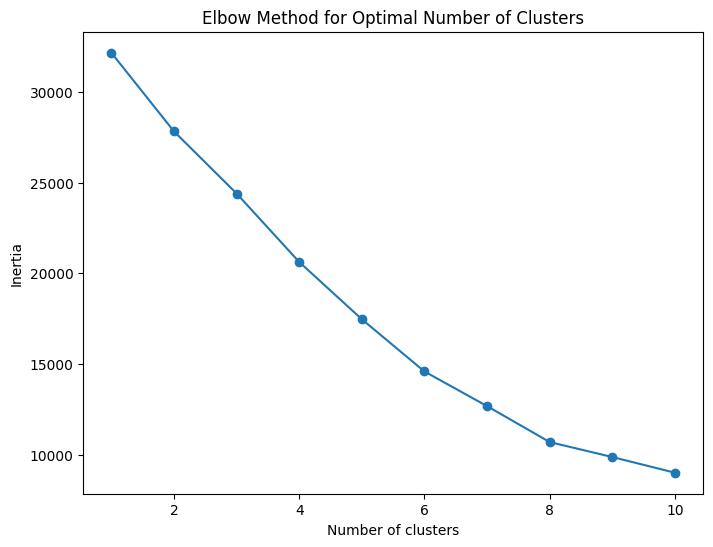

In [3]:
# 엘보우 방법
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

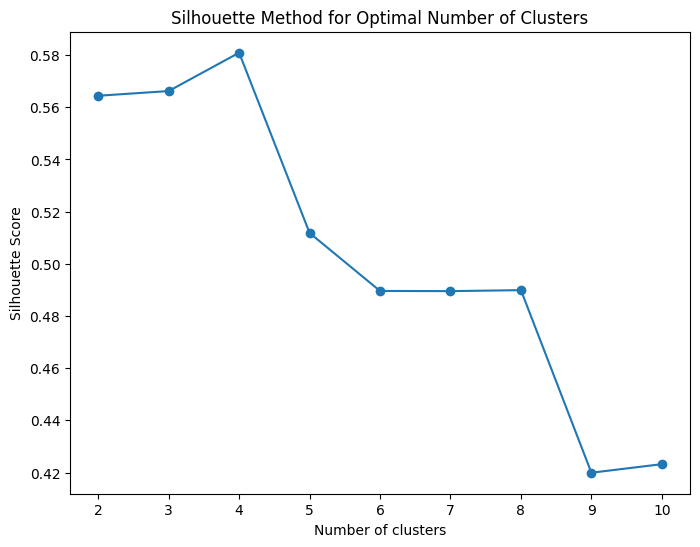

In [4]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 실루엣 스코어를 저장할 리스트
silhouette_scores = []

# 클러스터 수를 2부터 10까지 변경하며 실루엣 스코어 계산
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 스코어 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.show()


In [5]:
# 최적 클러스터 수 선택
optimal_clusters = 4

# K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

grid['cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   academy_count    univ_count  subway_count  apt_count     com_count  \
0       4.875479  6.730727e-16 -4.336809e-15   0.612548 -1.804112e-16   
1       4.654167 -4.857226e-17  1.087500e+00   0.491667  2.916667e-02   
2       3.062992  3.469447e-18  7.874016e-02   0.433071  1.346457e+00   
3       4.500000  1.230769e+00  9.615385e-02   0.480769  2.081668e-17   

   lcafe_count  hcafe_count  cluster  
0     0.374521     0.246887        0  
1     0.545833     0.454167        1  
2     0.787402     1.889764        2  
3     0.480769     0.288462        3  


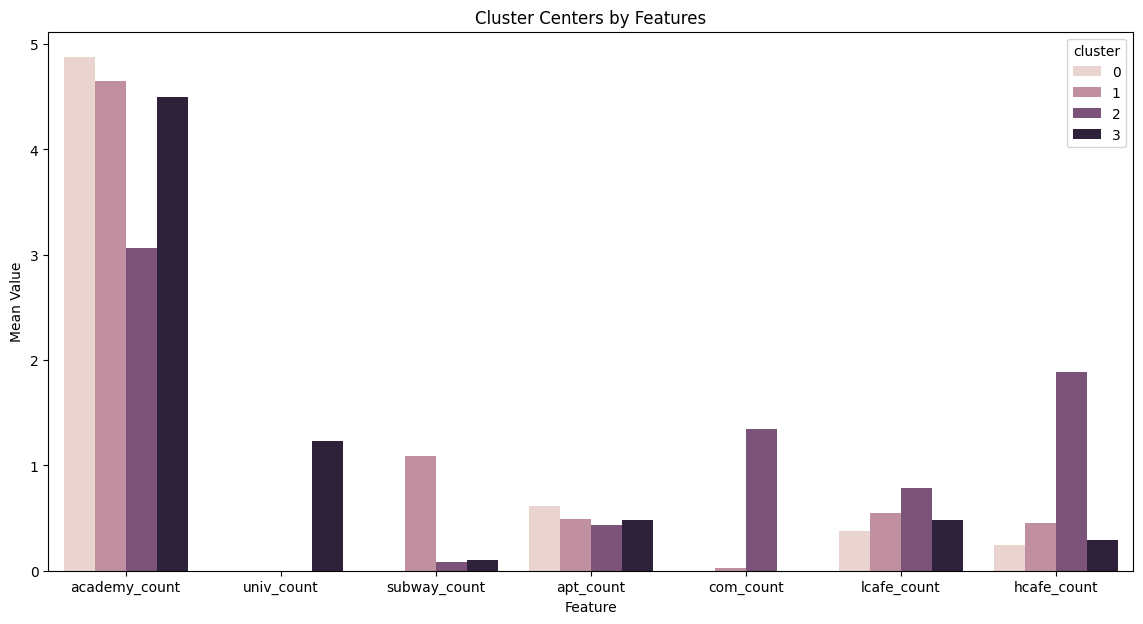

In [6]:
# 클러스터 중심 정보 확인
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
cluster_centers['cluster'] = range(optimal_clusters)
print(cluster_centers)
# 클러스터 특성 시각화
plt.figure(figsize=(14, 7))
sns.barplot(data=cluster_centers.melt(id_vars='cluster'), x='variable', y='value', hue='cluster')
plt.title('Cluster Centers by Features')
plt.ylabel('Mean Value')
plt.xlabel('Feature')
plt.show()

In [7]:
# 클러스터별로 그룹화하여 density_rank가 1인 구역의 수와 전체 구역 수를 계산
cluster_density = grid.groupby('cluster').apply(lambda x: (x['density_rank'] == 1).sum() / len(x))

# 비율이 가장 높은 클러스터 식별
high_density_cluster = cluster_density.idxmax()

# 해당 클러스터에 속하는 구역 필터링
similar_regions = grid[grid['cluster'] == high_density_cluster]

print(f"Cluster {high_density_cluster} has the highest proportion of density_rank 1 regions.")
print(similar_regions)


Cluster 2 has the highest proportion of density_rank 1 regions.
      school_count  academy_count  subway_count  bus_count  apt_count  \
158              0              5             0          4          1   
187              0              0             0          0          0   
190              0              1             0         12          0   
233              0              0             0         24          0   
249              0              2             0         28          0   
...            ...            ...           ...        ...        ...   
3667             0              0             0          0          0   
3774             0              0             0          4          0   
3897             0              0             0          8          0   
3902             0              0             0         16          0   
4442             0             14             1         24          0   

      univ_count  lcom_count  ccom_count  lcafe_count  hcaf

In [8]:
# 클러스터별로 그룹화하여 density가 0이 아닌 구역의 수와 전체 구역 수를 계산
cluster_density_nonzero = grid.groupby('cluster').apply(lambda x: (x['density'] != 0).sum() / len(x))

# 비율이 가장 높은 클러스터 식별
high_density_cluster = cluster_density_nonzero.idxmax()

# 해당 클러스터에 속하는 구역 필터링
similar_regions = grid[grid['cluster'] == high_density_cluster]

print(f"Cluster {high_density_cluster} has the highest proportion of non-zero density regions.")
print(similar_regions)


Cluster 2 has the highest proportion of non-zero density regions.
      school_count  academy_count  subway_count  bus_count  apt_count  \
158              0              5             0          4          1   
187              0              0             0          0          0   
190              0              1             0         12          0   
233              0              0             0         24          0   
249              0              2             0         28          0   
...            ...            ...           ...        ...        ...   
3667             0              0             0          0          0   
3774             0              0             0          4          0   
3897             0              0             0          8          0   
3902             0              0             0         16          0   
4442             0             14             1         24          0   

      univ_count  lcom_count  ccom_count  lcafe_count  hc

In [10]:
# 클러스터 2에 속하는 구역
cluster_2 = grid[grid['cluster'] == 2]

# density 값 낮은 순으로 정렬
cluster_2_sorted = cluster_2.sort_values(by='density')

print("Cluster 2 regions sorted by density (ascending order):")
print(cluster_2_sorted[['centroid', 'density']])

Cluster 2 regions sorted by density (ascending order):
                                           centroid  density
158    POINT (127.10458600000003 37.46279400000001)        0
2160           POINT (127.089586 37.53779399999999)        0
2081           POINT (127.08658600000001 37.534794)        0
2056           POINT (126.96958599999999 37.534794)        0
2001  POINT (127.08658600000001 37.531794000000005)        0
...                                             ...      ...
1823   POINT (126.92158599999999 37.52579399999999)        7
2875                   POINT (126.972586 37.561794)        8
3053           POINT (126.98158600000002 37.567794)       10
2878           POINT (126.98158600000002 37.561794)       12
1543                   POINT (127.056586 37.513794)       53

[127 rows x 2 columns]


In [12]:
cluster_2_sorted = grid[grid['cluster'] == 2].sort_values(by='density')
# 필요한 열만 선택
cluster_2_sorted = cluster_2_sorted[['centroid', 'density']]
# 엑셀 파일로 저장
output_file_path = 'cluster_2_sorted.xlsx'
cluster_2_sorted.to_excel(output_file_path, index=False)

files.download(output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>